In [31]:
import pandas as pd
import numpy as np
import time
import librosa
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle
from pydub import AudioSegment
import sounddevice as sd

Táto časť kódu importuje knižnice Pandas, NumPy, librosa, Matplotlib a Seaborn. Importovaná je aj funkcia cycle z knižnice itertools. Tieto knižnice sa používajú na analýzu a vizualizáciu údajov, ako aj na generovanie farebných paliet.


In [32]:
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])


Táto časť kódu nastavuje vizualizačný štýl pomocou funkcie set_theme z knižnice Seaborn. Farebné palety sa tiež generujú pomocou funkcie by_key().


In [33]:
def dbAmpChange(input, dBChange):
    G =10** (dBChange/20) 
    output = G*input
    return output 

Táto časť kódu definuje funkciu dbAmpChange, ktorá prijíma vstupný zvukový signál a hodnotu zmeny hlasitosti v decibeloch. Funkcia vracia zvukový signál so zmenenou úrovňou hlasitosti.


In [34]:
x, Fs = librosa.load("../git/sounds/AcGtr.wav") # cesta na .wav file 

dB1 = 3; dB2 = -6;
y1 = dbAmpChange(x,dB1);
y2 = dbAmpChange(x,dB2);

Táto časť kódu načíta zvukový signál zo súboru piano.wav pomocou funkcie load z knižnice librosa. Potom sa určia dve úrovne hlasitosti dB1 a dB2 a vypočíta sa zvukový signál so zmenenými úrovňami hlasitosti

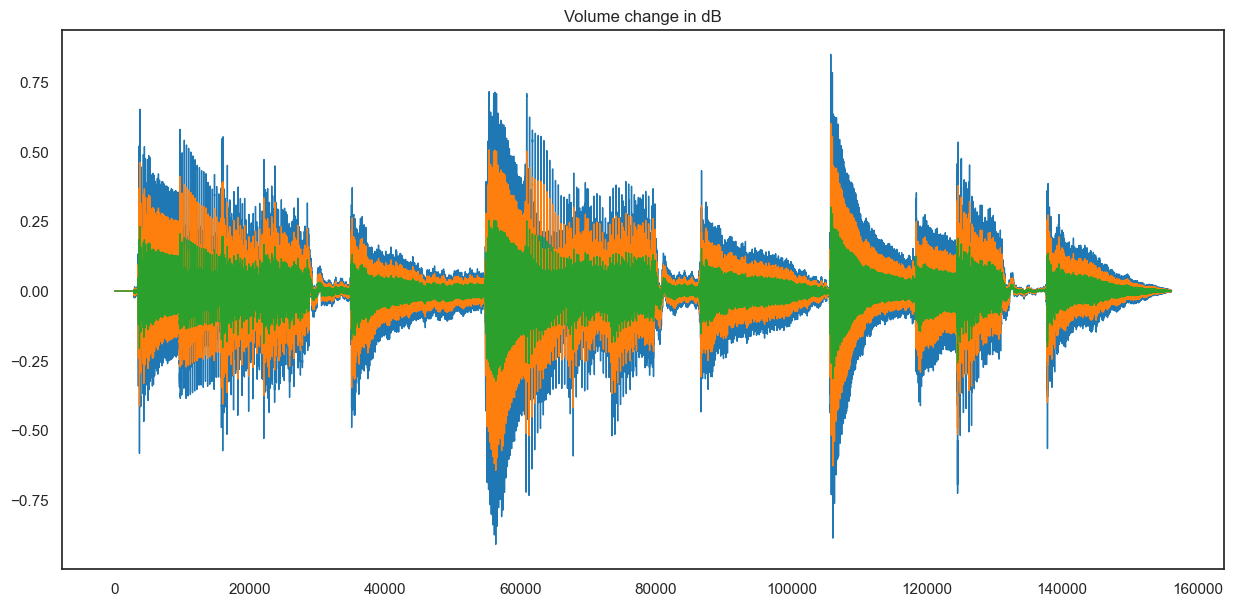

In [35]:
pd.Series(y1).plot(figsize=(15,7),
                  lw=1,
                  title='Volume change in dB',
                  color=color_pal[0])
pd.Series(x).plot(figsize=(15,7),
                  lw=1,
                  title='',
                  color=color_pal[1])
pd.Series(y2).plot(figsize=(15,7),
                  lw=1,
                  title='',
                  color=color_pal[2])
plt.show()


Pôvodný signál je označený oranžovou farbou, signál, ktoreho amplituda sa zvyšila o koeficient 3 dB, je označený modrou farbou a signál, ktoreho amplituda bola zmenena o koeficien -6 dB, je označený zelenou farbou.

In [36]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/AcGtr.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(y1, Fs)
time.sleep(seconds_duration + 1)
sd.play(y2, Fs)